In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('F:\\Cyprus\\CSV-01-12\\01-12\\UDPLag.csv')

c:\users\charan\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [5]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
3,24498,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,55447,192.168.50.1,5691,17,2018-12-01 13:04:45.929024,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
4,117372,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,58794,192.168.50.1,56335,17,2018-12-01 13:04:45.929096,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [6]:
ack = df[' ACK Flag Count']
pd.unique(ack)

array([0, 1], dtype=int64)

In [7]:
init = df['Init_Win_bytes_forward']
pd.unique(init)

array([   -1,   247,   259, 65535,    64,   236, 16096,   237,  1024,
        8192,   119,   899, 16465, 29200,   258,   251,   256,   235,
         255,   245,   243, 16425,  1892,  1959,   266, 16560,   238,
       16387, 16345, 16346,  2026,  2093,   227,   254,   302,   242,
       64209, 36500, 16229,   121,   246,     0,   244, 64240, 16548,
       16155,  4291, 16315, 14600,   290,   252,   257,  1825, 25669,
       35040, 62975, 16439, 16537,   250, 16281, 16415, 16271, 16255,
       16257, 16471, 16525,   274,   277,   278,   289,    29,   253,
         123, 24456,   222, 63948, 31374,   876, 16404,    12, 28400,
       32120, 33580, 63639, 16084, 16360, 16282, 16373,   288, 17922,
         171,   286,   130,    60, 63846, 63368, 63012, 32054,   114,
         145,   296,  4272,  4271, 32328, 62967, 32928,   127,   282,
         344, 63456, 32098, 16352, 16489,   248, 60775,  5840,  1026,
         153, 63367,  1896,   380,   365,  4253,  1022, 16383, 16157,
       16209, 16233,

In [8]:
seg = df[' min_seg_size_forward'].tolist()
pd.unique(seg)

array([         -1,           0, -1062718975,          32,           8,
                14,         393,          20,         369,         360,
               321,         401,          40,          28,          24,
                44,        1472,        1116])

In [10]:
iat = df[' Fwd IAT Mean']
pd.unique(iat)


array([1.00000000e+00, 2.00000000e+00, 3.54740000e+04, ...,
       4.78750000e+04, 7.33573333e+04, 1.75000000e+02])

In [11]:
flow = df[' Fwd IAT Max']
pd.unique(flow)


array([1.00000e+00, 2.00000e+00, 1.06420e+05, ..., 1.43623e+05,
       2.20070e+05, 1.75000e+02])

In [48]:
label = df[' Label']
pd.unique(label)


array(['UDP-lag', 'BENIGN'], dtype=object)

In [ ]:
df=df[df[' Label']!='WebDDoS']
pd.value_counts(df[' Label'])

In [63]:
df[' Label'].value_counts()[0]

366461

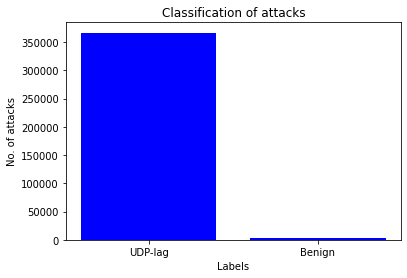

In [65]:
data = {'UDP-lag':df[' Label'].value_counts()[0], 'Benign':df[' Label'].value_counts()[1]}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='blue')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [21]:
data = [df[" ACK Flag Count"], df["Init_Win_bytes_forward"],df[" min_seg_size_forward"], df[" Fwd IAT Mean"],df[" Fwd IAT Max"], df[" Label"]]

In [22]:
headers = ["ack", "init","seg","iatmean","iatmax","label"]

In [23]:
df1 = pd.concat(data, axis=1, keys=headers)

In [24]:
df1

,ack,init,seg,iatmean,iatmax,label
0,0,-1,-1,1.0,1.0,UDP-lag
1,0,-1,-1,1.0,1.0,UDP-lag
2,0,-1,-1,2.0,2.0,UDP-lag
3,0,-1,-1,2.0,2.0,UDP-lag
4,0,-1,-1,1.0,1.0,UDP-lag
...,...,...,...,...,...,...
370600,1,5840,20,1.0,1.0,UDP-lag
370601,1,5840,20,1.0,1.0,UDP-lag
370602,1,5840,20,2.0,2.0,UDP-lag
370603,1,5840,20,0.0,0.0,UDP-lag


In [25]:
df1.to_csv("udp_lag_attributes.csv")


## Model Creation

In [26]:
df1=pd.read_csv('udp_lag_attributes.csv')

In [27]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [28]:
# label encoding for Y values
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [29]:
pd.unique(df1['label'])
# 1 = UDPLag
# 0 = Benign

array([1, 0])

In [30]:
df1

,Unnamed: 0,ack,init,seg,iatmean,iatmax,label
0,0,0,-1,-1,1.0,1.0,1
1,1,0,-1,-1,1.0,1.0,1
2,2,0,-1,-1,2.0,2.0,1
3,3,0,-1,-1,2.0,2.0,1
4,4,0,-1,-1,1.0,1.0,1
...,...,...,...,...,...,...,...
370161,370600,1,5840,20,1.0,1.0,1
370162,370601,1,5840,20,1.0,1.0,1
370163,370602,1,5840,20,2.0,2.0,1
370164,370603,1,5840,20,0.0,0.0,1


In [31]:
# sample 10000 points from majority class to create new dataset
df_maj = df1[df1['label']==1]
df_min = df1[df1['label']==0]
df_maj = df_maj.sample(n=10000)
df_maj = pd.concat([df_maj,df_min], axis=0)


In [32]:
len(df_maj)

13705

In [33]:
X = df_maj.drop('label',axis=1)
y = df_maj['label']

In [34]:
X

,Unnamed: 0,ack,init,seg,iatmean,iatmax
102603,103016,1,5840,20,1.000000e+00,1.0
123924,124337,1,5840,20,1.000000e+00,1.0
69297,69708,1,5840,20,0.000000e+00,0.0
24401,24403,0,-1,8,1.000000e+00,1.0
311988,312420,1,5840,20,0.000000e+00,0.0
...,...,...,...,...,...,...
278156,278588,0,-1,20,1.000000e+00,1.0
278285,278717,0,-1,20,2.000000e+00,2.0
278288,278720,0,-1,20,1.000000e+00,1.0
324712,325145,1,8192,32,1.003180e+06,3009538.0


In [35]:
X['init'].value_counts()

 5840     8634
-1        2980
 8192      491
 64240     243
 256       147
 254        92
 255        81
 246        74
 258        70
 257        63
 253        55
 1892       50
 250        37
 1825       34
 16425      33
 252        29
 237        27
 247        25
 1959       23
 238        23
 119        20
 245        16
 242        14
 16360      14
 251        13
 12         13
 288        12
 123        10
 0           9
 16471       9
 16560       9
 16537       8
 32120       7
 277         6
 33580       6
 278         6
 62975       6
 289         6
 4291        6
 268         6
 262         6
 16228       6
 60          6
 4272        5
 121         5
 114         4
 16257       4
 274         4
 1024        4
 16229       4
 16383       4
 131         4
 16096       4
 16281       4
 16439       4
 35040       4
 259         4
 270         4
 300         4
 16271       4
 16321       4
 62967       3
 4253        3
 130         3
 1026        3
 135         3
 127      

In [36]:
# train and test split from newly created dataset 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32, shuffle=True)

In [37]:
y_test.value_counts()

1    1963
0     778
Name: label, dtype: int64

In [38]:
# perform smote for the dataset to solve imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [39]:
y_train.value_counts()

1    8037
0    8037
Name: label, dtype: int64

In [40]:
x_train

,Unnamed: 0,ack,init,seg,iatmean,iatmax
0,225014,1,5840,20,1.000000e+00,1.000000e+00
1,52310,0,-1,20,3.000000e+00,3.000000e+00
2,157414,1,5840,20,4.800000e+01,4.800000e+01
3,193252,1,5840,20,0.000000e+00,0.000000e+00
4,45461,0,-1,20,3.000000e+00,3.000000e+00
...,...,...,...,...,...,...
16069,51997,0,-1,20,2.263144e+00,2.263144e+00
16070,52951,0,373,20,5.925191e-01,7.900254e-01
16071,52574,0,256,20,8.351289e+01,3.275244e+02
16072,49984,1,30811,20,2.185279e+06,1.008073e+07


In [41]:
# concatenate dataset for passing to pycaret
train_dataset = pd.concat([x_train,y_train],axis=1)
test_dataset = pd.concat([x_test,y_test],axis=1)

In [36]:
#train_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
# test_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [42]:
train_dataset

,Unnamed: 0,ack,init,seg,iatmean,iatmax,label
0,225014,1,5840,20,1.000000e+00,1.000000e+00,1
1,52310,0,-1,20,3.000000e+00,3.000000e+00,0
2,157414,1,5840,20,4.800000e+01,4.800000e+01,1
3,193252,1,5840,20,0.000000e+00,0.000000e+00,1
4,45461,0,-1,20,3.000000e+00,3.000000e+00,0
...,...,...,...,...,...,...,...
16069,51997,0,-1,20,2.263144e+00,2.263144e+00,0
16070,52951,0,373,20,5.925191e-01,7.900254e-01,0
16071,52574,0,256,20,8.351289e+01,3.275244e+02,0
16072,49984,1,30811,20,2.185279e+06,1.008073e+07,0


In [43]:
test_dataset

,Unnamed: 0,ack,init,seg,iatmean,iatmax,label
67431,67842,1,5840,20,6569083.0,18516094.0,1
12639,12639,0,-1,-1,43408.4,110059.0,1
155239,155654,1,5840,20,1.0,1.0,1
48084,48200,0,1959,20,0.0,0.0,0
43238,43260,0,2026,20,0.0,0.0,0
...,...,...,...,...,...,...,...
99765,100178,1,5840,20,7733541.0,20730154.0,1
201682,202103,1,5840,20,0.0,0.0,1
313969,314401,1,5840,20,1.0,1.0,1
198333,198754,1,5840,20,0.0,0.0,1


In [44]:
len(train_dataset['init'].value_counts())

939

In [45]:
# pycaret init
exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16074, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [46]:
xgb_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9907,0.9987,0.9876,0.9937,0.9906,0.9813,0.9814
1,0.9900,0.9994,0.9888,0.9913,0.9900,0.9801,0.9801
2,0.9913,0.9993,0.9876,0.9950,0.9913,0.9826,0.9826
3,0.9925,0.9995,0.9888,0.9962,0.9925,0.9851,0.9851
4,0.9925,0.9995,0.9863,0.9987,0.9925,0.9851,0.9851
5,0.9950,0.9997,0.9900,1.0000,0.9950,0.9900,0.9901
6,0.9938,0.9997,0.9876,1.0000,0.9937,0.9876,0.9876
7,0.9944,0.9996,0.9888,1.0000,0.9944,0.9888,0.9889
8,0.9907,0.9983,0.9813,1.0000,0.9906,0.9813,0.9815
9,0.9938,0.9999,0.9875,1.0000,0.9937,0.9876,0.9876


In [47]:
tuned_xgb = tune_model(xgb_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9863,0.9979,0.9863,0.9863,0.9863,0.9726,0.9726
1,0.9894,0.9991,0.9888,0.9900,0.9894,0.9789,0.9789
2,0.9913,0.9994,0.9913,0.9913,0.9913,0.9826,0.9826
3,0.9913,0.9993,0.9900,0.9925,0.9913,0.9826,0.9826
4,0.9913,0.9992,0.9876,0.9950,0.9913,0.9826,0.9826
5,0.9938,0.9998,0.9900,0.9975,0.9938,0.9876,0.9876
6,0.9932,0.9995,0.9863,1.0000,0.9931,0.9863,0.9864
7,0.9932,0.9994,0.9863,1.0000,0.9931,0.9863,0.9864
8,0.9907,0.9989,0.9813,1.0000,0.9906,0.9813,0.9815
9,0.9950,0.9999,0.9913,0.9987,0.9950,0.9900,0.9901


In [49]:
ada_model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.9982,0.9838,0.9987,0.9912,0.9826,0.9827
1,0.9894,0.9981,0.9826,0.9962,0.9894,0.9789,0.9789
2,0.9932,0.9996,0.9888,0.9975,0.9931,0.9863,0.9864
3,0.9900,0.9991,0.9863,0.9937,0.9900,0.9801,0.9801
4,0.9913,0.9985,0.9863,0.9962,0.9912,0.9826,0.9826
5,0.9938,0.9996,0.9888,0.9987,0.9938,0.9876,0.9876
6,0.9894,0.9995,0.9801,0.9987,0.9893,0.9788,0.9790
7,0.9900,0.9992,0.9801,1.0000,0.9899,0.9801,0.9803
8,0.9900,0.9982,0.9801,1.0000,0.9899,0.9801,0.9803
9,0.9888,0.9996,0.9788,0.9987,0.9887,0.9776,0.9778


In [50]:
tuned_ada = tune_model(ada_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9900,0.9982,0.9813,0.9987,0.9900,0.9801,0.9802
1,0.9876,0.9989,0.9826,0.9925,0.9875,0.9751,0.9752
2,0.9925,0.9993,0.9888,0.9962,0.9925,0.9851,0.9851
3,0.9907,0.9990,0.9863,0.9950,0.9906,0.9813,0.9814
4,0.9932,0.9986,0.9863,1.0000,0.9931,0.9863,0.9864
5,0.9932,0.9996,0.9876,0.9987,0.9931,0.9863,0.9864
6,0.9888,0.9994,0.9789,0.9987,0.9887,0.9776,0.9778
7,0.9894,0.9991,0.9788,1.0000,0.9893,0.9788,0.9791
8,0.9888,0.9980,0.9776,1.0000,0.9887,0.9776,0.9778
9,0.9888,0.9996,0.9788,0.9987,0.9887,0.9776,0.9778


In [51]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9972,0.9913,0.9938,0.9925,0.9851,0.9851
1,0.9876,0.9971,0.9900,0.9851,0.9876,0.9751,0.9751
2,0.9944,0.9998,0.9938,0.9950,0.9944,0.9888,0.9888
3,0.9932,0.9972,0.9913,0.9950,0.9931,0.9863,0.9863
4,0.9950,0.9985,0.9900,1.0000,0.9950,0.9900,0.9901
5,0.9956,0.9980,0.9913,1.0000,0.9956,0.9913,0.9913
6,0.9944,0.9961,0.9900,0.9987,0.9944,0.9888,0.9888
7,0.9938,0.9980,0.9875,1.0000,0.9937,0.9876,0.9876
8,0.9932,0.9960,0.9863,1.0000,0.9931,0.9863,0.9864
9,0.9950,0.9987,0.9913,0.9987,0.9950,0.9900,0.9901


In [52]:
tuned_rf = tune_model(rf_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9907,0.9975,0.9813,1.0000,0.9906,0.9813,0.9815
1,0.9888,0.9985,0.9801,0.9975,0.9887,0.9776,0.9778
2,0.9925,0.9994,0.9863,0.9987,0.9925,0.9851,0.9852
3,0.9925,0.9984,0.9851,1.0000,0.9925,0.9851,0.9852
4,0.9925,0.9986,0.9851,1.0000,0.9925,0.9851,0.9852
5,0.9938,0.9997,0.9876,1.0000,0.9937,0.9876,0.9876
6,0.9894,0.9989,0.9801,0.9987,0.9893,0.9788,0.9790
7,0.9894,0.9988,0.9788,1.0000,0.9893,0.9788,0.9791
8,0.9876,0.9969,0.9751,1.0000,0.9874,0.9751,0.9754
9,0.9888,0.9992,0.9776,1.0000,0.9887,0.9776,0.9778


In [53]:
lgbm_model=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9913,0.9989,0.9900,0.9925,0.9913,0.9826,0.9826
1,0.9925,0.9995,0.9900,0.9950,0.9925,0.9851,0.9851
2,0.9907,0.9994,0.9925,0.9888,0.9907,0.9813,0.9814
3,0.9932,0.9995,0.9888,0.9975,0.9931,0.9863,0.9864
4,0.9919,0.9995,0.9863,0.9975,0.9919,0.9838,0.9839
5,0.9950,0.9999,0.9900,1.0000,0.9950,0.9900,0.9901
6,0.9932,0.9998,0.9863,1.0000,0.9931,0.9863,0.9864
7,0.9944,0.9995,0.9888,1.0000,0.9944,0.9888,0.9889
8,0.9913,0.9991,0.9826,1.0000,0.9912,0.9826,0.9827
9,0.9938,0.9999,0.9875,1.0000,0.9937,0.9876,0.9876


In [54]:
tuned_lgbm = tune_model(lgbm_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9907,0.9985,0.9863,0.9950,0.9906,0.9813,0.9814
1,0.9919,0.9993,0.9876,0.9962,0.9919,0.9838,0.9839
2,0.9938,0.9995,0.9900,0.9975,0.9938,0.9876,0.9876
3,0.9944,0.9995,0.9888,1.0000,0.9944,0.9888,0.9889
4,0.9932,0.9994,0.9863,1.0000,0.9931,0.9863,0.9864
5,0.9950,0.9999,0.9900,1.0000,0.9950,0.9900,0.9901
6,0.9925,0.9996,0.9851,1.0000,0.9925,0.9851,0.9852
7,0.9913,0.9996,0.9826,1.0000,0.9912,0.9826,0.9827
8,0.9900,0.9991,0.9813,0.9987,0.9899,0.9801,0.9802
9,0.9938,0.9999,0.9875,1.0000,0.9937,0.9876,0.9876


In [55]:
lr_model=create_model('lr') #JUST TO CHECK IF ITS SHOWING GOOD RESULTS FOR ALL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6269,0.8754,0.9963,0.5730,0.7275,0.2537,0.3765
1,0.9248,0.9614,0.8831,0.9634,0.9215,0.8495,0.8525
2,0.9453,0.9701,0.9179,0.9711,0.9437,0.8905,0.8919
3,0.6343,0.8676,1.0000,0.5776,0.7322,0.2687,0.3939
4,0.9384,0.9755,0.8955,0.9796,0.9357,0.8768,0.8800
5,0.6341,0.8806,0.9988,0.5777,0.7320,0.2679,0.3917
6,0.9415,0.9756,0.9005,0.9810,0.9390,0.8830,0.8860
7,0.6385,0.8708,1.0000,0.5802,0.7343,0.2772,0.4012
8,0.6497,0.8714,0.9963,0.5882,0.7397,0.2996,0.4155
9,0.6441,0.8825,1.0000,0.5840,0.7374,0.2884,0.4105


## Manual training

In [66]:
x_test.drop(['Unnamed: 0'],axis=1,inplace=True)
x_train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [67]:
x_test

,ack,init,seg,iatmean,iatmax
67431,1,5840,20,6569083.0,18516094.0
12639,0,-1,-1,43408.4,110059.0
155239,1,5840,20,1.0,1.0
48084,0,1959,20,0.0,0.0
43238,0,2026,20,0.0,0.0
...,...,...,...,...,...
99765,1,5840,20,7733541.0,20730154.0
201682,1,5840,20,0.0,0.0
313969,1,5840,20,1.0,1.0
198333,1,5840,20,0.0,0.0


In [68]:
x_train

,ack,init,seg,iatmean,iatmax
0,1,5840,20,1.000000e+00,1.000000e+00
1,0,-1,20,3.000000e+00,3.000000e+00
2,1,5840,20,4.800000e+01,4.800000e+01
3,1,5840,20,0.000000e+00,0.000000e+00
4,0,-1,20,3.000000e+00,3.000000e+00
...,...,...,...,...,...
16069,0,-1,20,2.263144e+00,2.263144e+00
16070,0,373,20,5.925191e-01,7.900254e-01
16071,0,256,20,8.351289e+01,3.275244e+02
16072,1,30811,20,2.185279e+06,1.008073e+07


### Training Different Models

In [69]:
xgb = XGBClassifier(scale_pos_weight=1)
xgb_clf = xgb.fit(x_train,y_train)
predictions_xgb = xgb_clf.predict(x_test)



In [70]:
x_train

,ack,init,seg,iatmean,iatmax
0,1,5840,20,1.000000e+00,1.000000e+00
1,0,-1,20,3.000000e+00,3.000000e+00
2,1,5840,20,4.800000e+01,4.800000e+01
3,1,5840,20,0.000000e+00,0.000000e+00
4,0,-1,20,3.000000e+00,3.000000e+00
...,...,...,...,...,...
16069,0,-1,20,2.263144e+00,2.263144e+00
16070,0,373,20,5.925191e-01,7.900254e-01
16071,0,256,20,8.351289e+01,3.275244e+02
16072,1,30811,20,2.185279e+06,1.008073e+07


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       1.00      0.98      0.99      1963

    accuracy                           0.98      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.98      0.98      0.98      2741



In [72]:
print("xgb Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print("xgb roc_auc Score -> ",roc_auc_score(y_test,predictions_xgb))
print("f1 score ->", f1_score(y_test,predictions_xgb))

xgb Score ->  98.24881430134987
xgb roc_auc Score ->  0.9869978928951673
f1 score -> 0.9876352395672333


In [73]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       1.00      0.98      0.99      1963

    accuracy                           0.98      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.98      0.98      0.98      2741



In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
conf_mat_xgb = confusion_matrix(y_test,predictions_xgb)
print(conf_mat_xgb)

[[ 776    2]
 [  46 1917]]


# ADA BOOST

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(x_train,y_train)
predictions_ada = ada_clf.predict(x_test)

In [78]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       1.00      0.98      0.99      1963

    accuracy                           0.98      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.98      0.98      0.98      2741



In [79]:
print("ada Score -> ",accuracy_score(predictions_ada, y_test)*100)
print("ada roc_auc Score -> ",roc_auc_score(y_test,predictions_ada))
print("ada f1 score ->", f1_score(y_test,predictions_ada))

ada Score ->  98.10288215979568
ada roc_auc Score ->  0.9855910828475904
ada f1 score -> 0.98659793814433


# RF

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(x_train,y_train)
predictions_rf = rf_clf.predict(x_test)

In [81]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       1.00      0.98      0.99      1963

    accuracy                           0.98      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.98      0.98      0.98      2741



In [82]:
print("rf Score -> ",accuracy_score(predictions_rf, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_rf))
print("rf f1 score ->", f1_score(y_test,predictions_rf))

rf Score ->  98.24881430134987
rf roc_auc Score ->  0.9873858542417763
rf f1 score -> 0.9876288659793815


# LGBM

In [83]:
import lightgbm

In [84]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(x_train,y_train)
predictions_lgbm = lgbm_clf.predict(x_test)

In [85]:
print(classification_report(y_test,predictions_lgbm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       1.00      0.98      0.99      1963

    accuracy                           0.98      2741
   macro avg       0.97      0.99      0.98      2741
weighted avg       0.98      0.98      0.98      2741



In [86]:
print("rf Score -> ",accuracy_score(predictions_lgbm, y_test)*100)
print("rf roc_auc Score -> ",roc_auc_score(y_test,predictions_lgbm))
print("rf f1 score ->", f1_score(y_test,predictions_lgbm))

rf Score ->  98.21233126596132
rf roc_auc Score ->  0.9867431807199254
rf f1 score -> 0.9873743880443185


# Running on Whole Dataset


In [87]:
whole_df = df1
whole_df
whole_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [88]:
whole_y = whole_df['label']
whole_x = whole_df.drop(['label'],axis=1)

In [89]:
whole_x


,ack,init,seg,iatmean,iatmax
0,0,-1,-1,1.0,1.0
1,0,-1,-1,1.0,1.0
2,0,-1,-1,2.0,2.0
3,0,-1,-1,2.0,2.0
4,0,-1,-1,1.0,1.0
...,...,...,...,...,...
370161,1,5840,20,1.0,1.0
370162,1,5840,20,1.0,1.0
370163,1,5840,20,2.0,2.0
370164,1,5840,20,0.0,0.0


In [90]:
whole_x

,ack,init,seg,iatmean,iatmax
0,0,-1,-1,1.0,1.0
1,0,-1,-1,1.0,1.0
2,0,-1,-1,2.0,2.0
3,0,-1,-1,2.0,2.0
4,0,-1,-1,1.0,1.0
...,...,...,...,...,...
370161,1,5840,20,1.0,1.0
370162,1,5840,20,1.0,1.0
370163,1,5840,20,2.0,2.0
370164,1,5840,20,0.0,0.0


In [91]:
whole_predict_xgb = xgb_clf.predict(whole_x)

In [92]:
print(classification_report(whole_y,whole_predict_xgb))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_xgb)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.30      1.00      0.47      3705
           1       1.00      0.98      0.99    366461

    accuracy                           0.98    370166
   macro avg       0.65      0.99      0.73    370166
weighted avg       0.99      0.98      0.98    370166

[[  3699      6]
 [  8469 357992]]


In [93]:
whole_predict_ada = ada_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_ada))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_ada)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46      3705
           1       1.00      0.98      0.99    366461

    accuracy                           0.98    370166
   macro avg       0.65      0.99      0.72    370166
weighted avg       0.99      0.98      0.98    370166

[[  3697      8]
 [  8680 357781]]


In [94]:
whole_predict_rf = rf_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_rf))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_rf)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46      3705
           1       1.00      0.98      0.99    366461

    accuracy                           0.98    370166
   macro avg       0.65      0.99      0.73    370166
weighted avg       0.99      0.98      0.98    370166

[[  3702      3]
 [  8521 357940]]


In [95]:
whole_predict_lgbm = lgbm_clf.predict(whole_x)
print(classification_report(whole_y,whole_predict_lgbm))
conf_mat_xgb = confusion_matrix(whole_y,whole_predict_lgbm)
print(conf_mat_xgb)

              precision    recall  f1-score   support

           0       0.30      1.00      0.46      3705
           1       1.00      0.98      0.99    366461

    accuracy                           0.98    370166
   macro avg       0.65      0.99      0.73    370166
weighted avg       0.99      0.98      0.98    370166

[[  3700      5]
 [  8561 357900]]
